In [1]:
import pandas as pd
import numpy as np

### Prep Data


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-10-08 13:28:23--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2025-10-08 13:28:23 (113 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [6]:
#clean up column names to be consistent

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#standardize string values in the cells themselves

#first check which columns have strings:
strings = list(df.dtypes[df.dtypes == 'object'].index)
#all "object" are strings

print(strings)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory Data Analysis

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

##### Distribution of MSRP (price)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

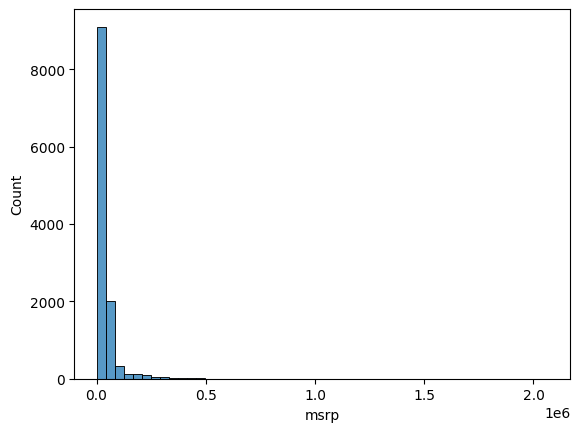

In [12]:
sns.histplot(df.msrp, bins=50, kde=False)

<Axes: xlabel='msrp', ylabel='Count'>

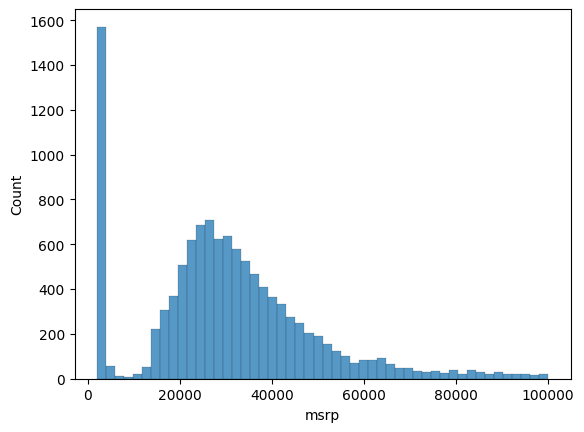

In [13]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50, kde=False, linewidth=0.1)

In [14]:
#get rid of long tail for our ml model by applying log

price_logs = np.log1p(df.msrp)
print(price_logs)

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64


<Axes: xlabel='msrp', ylabel='Count'>

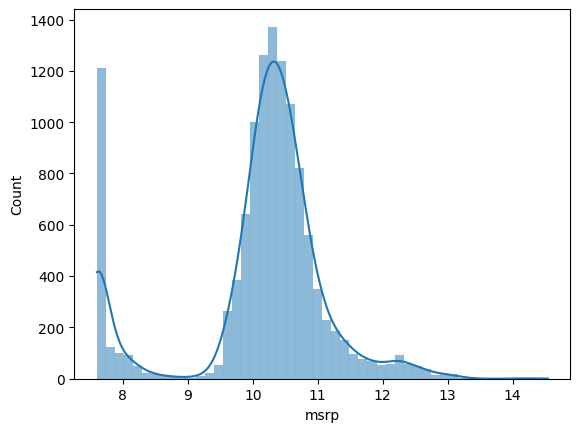

In [15]:
sns.histplot(price_logs, bins=50, kde=True, linewidth=0.01)

##### Missing Values

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the Validation Framework
We will split the dataset manually

In [17]:
# train 60% | val 20% | test 20%

n = len(df)
print("df length: ", n)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df length:  11914


In [18]:
n, n_val + n_test + n_train, n_val, n_test, n_train

#slightly smaller, because of rounding

(11914, 11914, 2382, 2382, 7150)

In [19]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test =  df.iloc[idx[n_train+n_val:]]

In [21]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [22]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [25]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [26]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

#delete to avoid accidentally using

In [27]:
len(y_train)

7150

### Linear Regression

Simple example

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [29]:
xi = [453, 11, 86] #feature matrix. taking 3 features for regression: engine_hp, mpg, popularity

In [30]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [31]:
np.expm1(linear_regression(xi))

np.float64(222347.2221101062)

Generalise to Vector Form

In [32]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [33]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

def linear_regression(xi):
    return w0 + dot(xi, w)

In [34]:
w_new = [w0] + w

In [35]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [36]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [37]:
linear_regression(xi)

12.312

Generalize to matrix-vector

In [38]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [39]:
x1 = [1,148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453,11,86]

X = [x1, x2, x10]
X = np.array(X)

In [40]:
def linear_regression(X):
    return X.dot(w_new) 

In [41]:
linear_regression(X) #these are our predicitons

array([12.38 , 13.552, 12.312])

### Training a Linear Regression Model

In [42]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]

]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [43]:
# w = (X_T * X)**-1 * X_T * y

XTX = X.T.dot(X)

XTX_inv = np.linalg.inv(XTX)

y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [44]:
XTX.dot(XTX_inv).round(1) #check

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [45]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [46]:
train_linear_regression(X, y)

(np.float64(25844.754055766833),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

### Apply this to build car price baseline model

In [47]:
print(df_train.dtypes)
df_train.columns

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [48]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

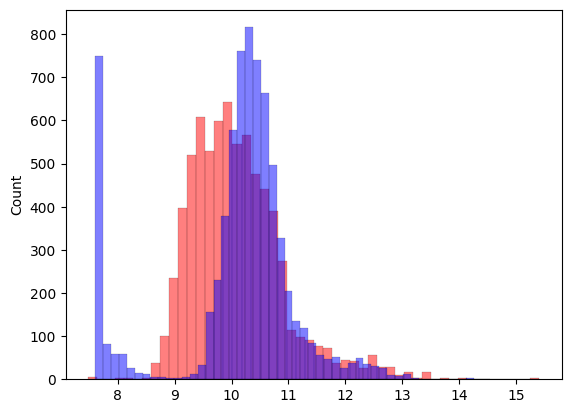

In [49]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, linewidth=0.1)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50, linewidth=0.1)

From this plot we can see that our model is not ideal. But we want a quantitative measure of this, so that we can also gauge improvements to the model. One way of doing this is to use Root Mean Squared Error (RMSE)

#### RMSE

RMSE = sqrt(avg((x - x_hat)**2))

In [50]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [51]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### Validating the Model

In [52]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [53]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [54]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301627)

#### Simple Feature Engineering

We know that year of make affects the price a lot. So we want to compute the age of the car and include this feature in training our model.

In [74]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [75]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    df_num = df[features].fillna(0)
    X = df_num.values
    
    return X

In [76]:
X_train = prepare_X(df_train)

RMSE:  0.5172055461058327


<Axes: ylabel='Count'>

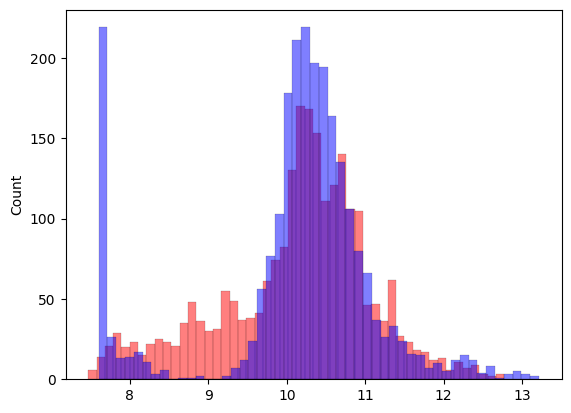

In [77]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print("RMSE: ", rmse(y_val, y_pred)) #lower rmse -- big improvement

#we can visualise this with histogram too

sns.histplot(y_pred, color='red', alpha=0.5, bins=50, linewidth=0.1)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50, linewidth=0.1)

### Categorical Variables

In [78]:
df_train.dtypes

#but number of doors, even though it is a float here, is also categorical. Only 2, 3 or 4

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [79]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features].fillna(0)
    X = df_num.values
    
    return X


In [80]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [81]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred) #lower rmse but not by much

np.float64(0.5157995641501902)

But the car make will probably have a large impact on performance

In [86]:
makes = list(df.make.value_counts().head().index)

In [87]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features].fillna(0)
    X = df_num.values
    
    return X

In [90]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print("RMSE: ", rmse(y_val, y_pred)) #improvement by about 1%

RMSE:  0.5076038849556633


In [91]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [94]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
]

In [95]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [96]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [97]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features].fillna(0)
    X = df_num.values
    
    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print("RMSE: ", rmse(y_val, y_pred)) #very high all of a sudden, something went wrong

RMSE:  20.255338567164987


#### Regularization

If there are duplicate columns in our matrix, then the inverse of the matrix does not exist/cannot be computed ("singular matrix")

This didn't happen here, because the data isn't super clean (noise, instead of recording value '5', a value 0f '5.00001' maye be recorded). So while the matrix is not singular, it is numerically invertible. The inverse shouldn't exist, but the computer still tries to find it, returning some very large values e.g., e+06.

To solve this problem, we add a small number on the diagonal of the matrix (+ alpha). This makes the values in the inverse matrix controlled/smaller, because it makes the columns less close to one another. This is the process of adding a regularisation term.

In [103]:
XTX = np.array([
    [1, 2, 2],
    [2, 1, 1.000001],
    [2, 1.0000001, 1]
])


In [ ]:
np.linalg.inv(XTX) #very large numbers

array([[-3.33333374e-01,  6.06060624e-02,  6.06060624e-01],
       [ 6.06060624e-01, -9.09090937e+05,  9.09090634e+05],
       [ 6.06060625e-02,  9.09090906e+05, -9.09090937e+05]])

In [105]:
XTX = XTX + 1 * np.eye(3)

In [107]:
np.linalg.inv(XTX) #smalles numbers, we have the weights under control

array([[-1.5000011,  1.000001 ,  1.0000001],
       [ 1.0000001, -0.       , -1.0000001],
       [ 1.000001 , -1.000001 , -0.       ]])

In [108]:
#we can modify our training loop to include regularization

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print("RMSE: ", rmse(y_val, y_pred)) #improvement not only from when adding all features, but even to before adding all features.

RMSE:  0.4565219901066027


The regularization term is a parameter/hyperparameter of our model that we tune. When it is too high, our model will perform worse, and when it is too low, our weights will get too big.

### Tuning the Model

How to find best value for r. We will use the validation set and try several different values for r.

In [110]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    print("r: ", r, "w0: ", w0, "RMSE: ", rmse(y_val, y_pred))

r:  0.0 w0:  150710170147060.28 RMSE:  20.255338567164987
r:  1e-05 w0:  8.157274761035366 RMSE:  0.4565170157295475
r:  0.0001 w0:  6.275543842862297 RMSE:  0.4565170637796298
r:  0.001 w0:  6.285496210990604 RMSE:  0.4565175088332509
r:  0.01 w0:  6.276604833752579 RMSE:  0.4565219901066027
r:  0.1 w0:  6.1912086909259 RMSE:  0.45656927630050337
r:  1 w0:  5.634896668332636 RMSE:  0.457220431799526
r:  10 w0:  4.283980108969942 RMSE:  0.47014569321004196


In [120]:
r = 0.0001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

print("RMSE: ", score)

RMSE:  0.4565170637796298


#### Checking this model on the Test Dataset (using the model)

We train the model on train + val and evaluate it on the test dataset

In [116]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [118]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [119]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [ ]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.0001)

In [ ]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

print("RMSE: ", score)

#almost same rmse as before. This is good, it means our model didn't just "get lucky"

RMSE:  0.4517745516775803


### Applying our model to predict the price of a car

In [128]:
car = df_test.iloc[20].to_dict() #this is how your information would arrive to the model
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [129]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [130]:
X_small = prepare_X(df_small)

In [132]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.46265927192021)

In [140]:
print("Price prediction: $", np.expm1(y_pred).round(1))

print("Actual price: $", np.expm1(y_test[20]).round(1))

Price prediction: $ 34983.5
Actual price: $ 35000.0
